- ASSIGNMENT: unsteady-cstr
- POINTS: 3
- DUEDATE: 2017-02-01 23:59:59
- CATEGORY: homework
- RUBRIC: default


Chapter two focused on the steady state behavior of the CSTR. Mathematically, this led to an algebraic equation. The full mole balance is:

 $\frac{dN_A}{dt} = F_{A0} - F_A + r_A V$ 

which resembles the batch reactor, but with flows. 

For the reaction  $A \rightarrow B$ , with  $-r_A = k C_A^2$ and  $k=3$ L/mol/hr in a CSTR with a volume of 66,000 L, with an inlet volumetric flow of 10 L/hr, and an inlet concentration of 0.5 M in A, plot the time dependent concentration of A in the reactor until it reaches steady state. You can assume that  $N_A(t=0) = 0$ for the initial condition. Discuss how long it takes for the reactor to approximately reach steady state (you should say what you mean by steady state, and how you determined the time to reach it).



# solution
We need to setup the ODE function and integrate it to a time long enough to observe steady state behavior. The mole balance is already in standard form.

In [1]:
%matplotlib inline
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Given data
k = 3 # L/mol/hr
V = 66000 # L
v0 = 10 # L/hr
Ca0 = 0.5
Na0 = 0 # mol

In [3]:
# Derived data
Fa0 = v0 * Ca0

In the ode function, we need to calculate the concentration from the number of moles in the reactor at a given time, and then use that to calculate the exit flow rate and reaction rate. The solution will be the number of moles of A in the reactor as a function of time, so we have to divide it by the volume to get it into concentration.

(0, 0.006)

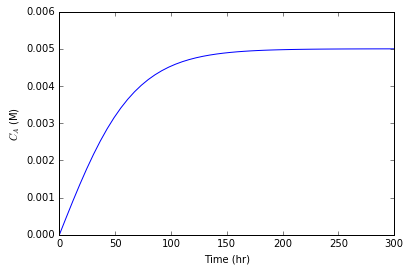

In [10]:
def ode(Na, t):
    Ca = Na / V
    Fa = v0 * Ca
    ra = -k * Ca**2
    dNadt = Fa0 - Fa + ra * V
    return dNadt

tspan = np.linspace(0, 300) # hours

sol = odeint(ode, Na0, tspan)

Ca = sol / V

plt.plot(tspan, Ca)
plt.xlabel('Time (hr)')
plt.ylabel('$C_A$ (M)')
plt.ylim([0, 0.006])

Steady state is where the concentration of A in the tank is not changing with time. It takes about 150-200 hours to reach steady state behavior. The concentration of A levels out at about 0.005 M, which is about 99% conversion. I changed the y-limits here to see the flat part more easily, otherwise the flat part overlaps with top of the graph and is not that easy to see.